#**Оценивание качества моделей классификации**

#**1. Бинарная классификация**

## Подготовка исходных данных

In [1]:
from numpy import genfromtxt
data = genfromtxt('/work/20.csv', delimiter = ',', dtype = None )

Записать полученные данные в таблицу.

In [2]:
import pandas as pd

df_data = pd.DataFrame(data)
df_data.head()

,0,1,2,3
0,0.945884,-1.398698,-0.056732,1.0
1,-0.429915,-3.781701,-2.488281,1.0
2,-0.503411,1.096289,1.654243,0.0
3,-0.204798,-1.856945,1.183272,1.0
4,1.521436,-0.626707,-0.356546,0.0


## Обучение модели

Обучение модели логистической регрессии.



In [3]:
from sklearn.linear_model import LogisticRegression

# Define the target variable and features in your data
X = df_data.drop(3, axis=1)  # replace "target_column" with the name of your target column
y = df_data[3]  # replace "target_column" with the name of your target column

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Вычисление предсказанных моделью меток классов.

In [4]:
y_pred = model.predict(X)

Добавить полученные значения в таблицу.

In [5]:
df_data['predicted'] = y_pred

## Accuracy

Вычислить метрику accuracy на основе следующего выражения:

$$\text{accuracy}(y, y^{pred}) = \frac{1}{n} \sum_{i=1}^n[y_i = y_i^{pred}]$$

In [6]:
accuracy = sum(df_data[3] == df_data['predicted']) / len(df_data)
accuracy

0.5944444444444444

Вычислить метрику accuracy с использованием класса`accuracy_score` модуля `metrics` библиотеки `sklearn`.

In [7]:
from sklearn.metrics import accuracy_score

accuracy_sklearn = accuracy_score(df_data[3], df_data['predicted'])
accuracy_sklearn

0.5944444444444444

## Матрица ошибок (Confusion Matrix)

Определить элементы матрицы ошибок.

Общий вид матрицы ошибок:

$$\begin{array}{c|cc}
& y^{pred}=1 & y^{pred}=0 \\ \hline
y^{true}=1 & \text{TP} & \text{FN} \\
y^{true}=0 & \text{FP} & \text{TN}\end{array}$$

In [8]:
TP = sum((df_data[3] == 1) & (df_data['predicted'] == 1))
FP = sum((df_data[3] == 0) & (df_data['predicted'] == 1))
TN = sum((df_data[3] == 0) & (df_data['predicted'] == 0))
FN = sum((df_data[3] == 1) & (df_data['predicted'] == 0))

Записать матрицу в таблицу.

In [9]:
from pandas import DataFrame

# assuming that TP, FP, TN, FN are defined
confusion_matrix = DataFrame(
    [[TP, FN],
     [FP, TN]], 
    columns=['Predicted Positive', 'Predicted Negative'], 
    index=['Actual Positive', 'Actual Negative']
)

confusion_matrix

,Predicted Positive,Predicted Negative
Actual Positive,66,26
Actual Negative,47,41


Построить матрицу ошибок с использованием класса `confusion_matrix` модуля `metrics` библиотеки `sklearn`.

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_data[3], df_data['predicted'])
cm

array([[41, 47],
       [26, 66]])

## Precision

Вычислить метрику precision на основании выражения вида:

$$\text{precision}(y, y^{pred}) = \frac{TP}{TP+FP}$$

In [11]:
precision = TP / (TP + FP)

Вычислить метрику Precision с использованием класса `precision_score` модуля `metrics` библиотеки `sklearn`.

In [12]:
from sklearn.metrics import precision_score

precision_sklearn = precision_score(df_data[3], df_data['predicted'])

##Recall

Вычислить метрику recall на основании выражения вида:

$$\text{recall}(y, y^{pred}) = \frac{TP}{TP+FN}$$

In [13]:
recall = TP / (TP + FN)

Вычислить метрику Recall с использованием класса `recall_score` модуля `metrics` библиотеки `sklearn`.

In [14]:
from sklearn.metrics import recall_score

recall_sklearn = recall_score(df_data[3], df_data['predicted'])
recall_sklearn

0.717391304347826

##F-мера

Вычислить F-меру с использованием класса `f1_score` модуля `metrics` библиотеки `sklearn`.

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(df_data[3], df_data['predicted'])
f1

0.6439024390243901

#**2. Многоклассовая классификация**

## Матрицы ошибок

Построить матрицы ошибок для каждого класса.

In [16]:
# For class 1
TP_1 = sum((df_data[3] == 1) & (df_data['predicted'] == 1))
FP_1 = sum((df_data[3] == 0) & (df_data['predicted'] == 1))
TN_1 = sum((df_data[3] == 0) & (df_data['predicted'] == 0))
FN_1 = sum((df_data[3] == 1) & (df_data['predicted'] == 0))

confusion_matrix_1 = DataFrame(
    [[TP_1, FN_1],
     [FP_1, TN_1]], 
    columns=['Predicted Positive', 'Predicted Negative'], 
    index=['Actual Positive', 'Actual Negative']
)

# For class 2
TP_2 = sum((df_data[3] == 2) & (df_data['predicted'] == 2))
FP_2 = sum((df_data[3] != 2) & (df_data['predicted'] == 2))
TN_2 = sum((df_data[3] != 2) & (df_data['predicted'] != 2))
FN_2 = sum((df_data[3] == 2) & (df_data['predicted'] != 2))

confusion_matrix_2 = DataFrame(
    [[TP_2, FN_2],
     [FP_2, TN_2]], 
    columns=['Predicted Positive', 'Predicted Negative'], 
    index=['Actual Positive', 'Actual Negative']
)

confusion_matrix_1, confusion_matrix_2

(                 Predicted Positive  Predicted Negative
 Actual Positive                  66                  26
 Actual Negative                  47                  41,
                  Predicted Positive  Predicted Negative
 Actual Positive                   0                   0
 Actual Negative                   0                 180)

Вычислить значения метрики `precision` для 2-х классов.

In [17]:
# For class 1
precision_1 = TP_1 / (TP_1 + FP_1) if (TP_1 + FP_1) != 0 else 0

# For class 2
precision_2 = TP_2 / (TP_2 + FP_2) if (TP_2 + FP_2) != 0 else 0

precision_1, precision_2

(0.584070796460177, 0)

Вычислить значения метрики `recall` для 2-х классов.

In [18]:
# For class 1
recall_1 = TP_1 / (TP_1 + FN_1) if (TP_1 + FN_1) != 0 else 0

# For class 2
recall_2 = TP_2 / (TP_2 + FN_2) if (TP_2 + FN_2) != 0 else 0

recall_1, recall_2

(0.717391304347826, 0)

Построить отчет о классификации.

In [19]:
from sklearn.metrics import classification_report

report = classification_report(df_data[3], df_data['predicted'])
print(report)

              precision    recall  f1-score   support

         0.0       0.61      0.47      0.53        88
         1.0       0.58      0.72      0.64        92

    accuracy                           0.59       180
   macro avg       0.60      0.59      0.59       180
weighted avg       0.60      0.59      0.59       180



Сделать вывод о качестве модели для каждого класса.

## Микроусреднение (micro)

Вычислить средние значения метрик `precision`, `recall` и `f1-меру` микроусреднением.

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(df_data[3], df_data['predicted'], average='micro')
micro_recall = recall_score(df_data[3], df_data['predicted'], average='micro')
micro_f1 = f1_score(df_data[3], df_data['predicted'], average='micro')

micro_precision, micro_recall, micro_f1

(0.5944444444444444, 0.5944444444444444, 0.5944444444444444)

## Макроусреднение (macro)

Вычислить средние значения метрик `precision`, `recall` и `f1-меру` макроусреднением.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

macro_precision = precision_score(df_data[3], df_data['predicted'], average='macro')
macro_recall = recall_score(df_data[3], df_data['predicted'], average='macro')
macro_f1 = f1_score(df_data[3], df_data['predicted'], average='macro')

macro_precision, macro_recall, macro_f1

(0.5980055474838198, 0.5916501976284585, 0.5864673485444531)

## Взвешенное усреднение (Weighted)

Вычислить средние значения метрик `precision`, `recall` и `f1-меру` взвешенным усреднением.

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

weighted_precision = precision_score(df_data[3], df_data['predicted'], average='weighted')
weighted_recall = recall_score(df_data[3], df_data['predicted'], average='weighted')
weighted_f1 = f1_score(df_data[3], df_data['predicted'], average='weighted')

weighted_precision, weighted_recall, weighted_f1

(0.5976958863499611, 0.5944444444444444, 0.5877436838884518)

Сделать вывод об особенностях каждого вида усреденения.

#**3. ROC-кривая (ROC-curve)**

Вычислить вероятности принадлежности объектов к классу 1 и добавить их значения в таблицу.

In [23]:
y_prob = model.predict_proba(X)[:, 1]
df_data['probabilities'] = y_prob
df_data

,0,1,2,3,predicted,probabilities
0,0.945884,-1.398698,-0.056732,1.0,0.0,0.476664
1,-0.429915,-3.781701,-2.488281,1.0,0.0,0.494138
2,-0.503411,1.096289,1.654243,0.0,1.0,0.580527
3,-0.204798,-1.856945,1.183272,1.0,1.0,0.568686
4,1.521436,-0.626707,-0.356546,0.0,0.0,0.436340
...,...,...,...,...,...,...
175,1.668820,0.665791,0.519891,0.0,0.0,0.445140
176,0.909669,0.626338,1.031339,1.0,0.0,0.496547
177,0.213754,-0.099893,-0.127821,1.0,1.0,0.504784
178,0.304421,1.298328,-0.707678,1.0,0.0,0.477882


Вычислить значения TPR (True Positive Rate) и FPR (False Positive Rate) для порога 0,5.


In [24]:
threshold = 0.5
TPR = sum((df_data[3] == 1) & (df_data['probabilities'] >= threshold)) / sum(df_data[3] == 1)
FPR = sum((df_data[3] == 0) & (df_data['probabilities'] >= threshold)) / sum(df_data[3] == 0)

## Вариация значений порога

Вычислить предсказанные метки классов исходя из порога 0.71 и записать полученные значения в таблицу.

In [25]:
df_data['predicted_0.71'] = (df_data['probabilities'] >= 0.71).astype(int)
df_data

,0,1,2,3,predicted,probabilities,predicted_0.71
0,0.945884,-1.398698,-0.056732,1.0,0.0,0.476664,0
1,-0.429915,-3.781701,-2.488281,1.0,0.0,0.494138,0
2,-0.503411,1.096289,1.654243,0.0,1.0,0.580527,0
3,-0.204798,-1.856945,1.183272,1.0,1.0,0.568686,0
4,1.521436,-0.626707,-0.356546,0.0,0.0,0.436340,0
...,...,...,...,...,...,...,...
175,1.668820,0.665791,0.519891,0.0,0.0,0.445140,0
176,0.909669,0.626338,1.031339,1.0,0.0,0.496547,0
177,0.213754,-0.099893,-0.127821,1.0,1.0,0.504784,0
178,0.304421,1.298328,-0.707678,1.0,0.0,0.477882,0


Построить матрицу ошибок для порога 0,71.

In [26]:
threshold_0_71 = 0.71
TP_0_71 = sum((df_data[3] == 1) & (df_data['probabilities'] >= threshold_0_71))
FP_0_71 = sum((df_data[3] == 0) & (df_data['probabilities'] >= threshold_0_71))
TN_0_71 = sum((df_data[3] == 0) & (df_data['probabilities'] < threshold_0_71))
FN_0_71 = sum((df_data[3] == 1) & (df_data['probabilities'] < threshold_0_71))

confusion_matrix_0_71 = pd.DataFrame(
    [[TP_0_71, FN_0_71],
     [FP_0_71, TN_0_71]], 
    columns=['Predicted Positive', 'Predicted Negative'], 
    index=['Actual Positive', 'Actual Negative']
)

confusion_matrix_0_71

,Predicted Positive,Predicted Negative
Actual Positive,0,92
Actual Negative,0,88


Записать матрицу в таблицу.

In [29]:
df_confusion_matrix = pd.DataFrame(confusion_matrix_0_71, index=['Actual Positive','Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])
df_confusion_matrix

,Predicted Positive,Predicted Negative
Actual Positive,0,92
Actual Negative,0,88


Вычислить значения TPR (True Positive Rate) и FPR (False Positive Rate) для порога 0,71.

In [30]:
TPR_0_71 = sum((df_data[3] == 1) & (df_data['probabilities'] >= threshold_0_71)) / sum((df_data[3] == 1))
FPR_0_71 = sum((df_data[3] == 0) & (df_data['probabilities'] >= threshold_0_71)) / sum((df_data[3] == 0))


Сделать вывод об изменении значений FPR и TPR.

## Построение ROC-кривой

Создать список со значениями порогов от 0 до 1 с шагом 0,1.

In [33]:
import numpy as np
thresholds = list(np.arange(0, 1.1, 0.1))

Вычислить значения метрик TPR и FPR для каждого из полученных порогов.

In [34]:
FPR = []
TPR = []

for t in thresholds:
    FP = sum((df_data[3] == 0) & (df_data['probabilities'] > t))
    TP = sum((df_data[3] == 1) & (df_data['probabilities'] > t))
    TN = sum((df_data[3] == 0) & (df_data['probabilities'] <= t))
    FN = sum((df_data[3] == 1) & (df_data['probabilities'] <= t))
    
    TPR.append(TP / (TP + FN))
    FPR.append(FP / (FP + TN))

Записать результаты вычислений в таблицу.

In [35]:
roc_data = pd.DataFrame({'Threshold': thresholds, 'TPR': TPR, 'FPR': FPR})
roc_data

,Threshold,TPR,FPR
0,0.0,1.000000,1.000000
1,0.1,1.000000,1.000000
2,0.2,1.000000,1.000000
3,0.3,1.000000,1.000000
4,0.4,1.000000,0.943182
5,0.5,0.717391,0.534091
6,0.6,0.032609,0.068182
7,0.7,0.000000,0.000000
8,0.8,0.000000,0.000000
9,0.9,0.000000,0.000000


Используя данные таблицы построить ROC-кривую.

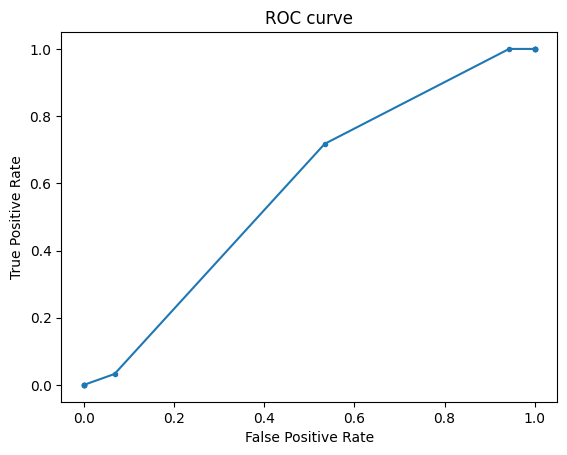

In [36]:
import matplotlib.pyplot as plt

# Use roc_data for building the ROC curve
plt.plot(roc_data['FPR'], roc_data['TPR'], marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Определить оптимальное значение порога.

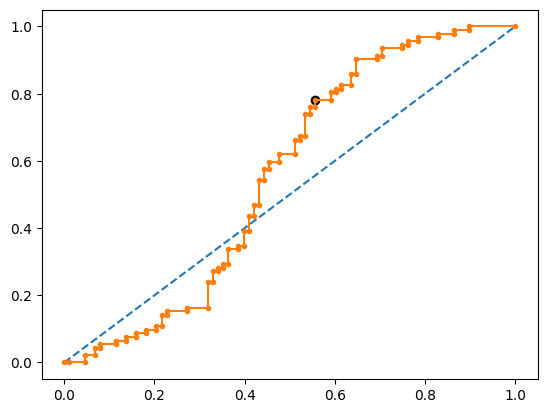

Best Threshold=0.493113, G-Mean=0.589


In [37]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y, preds)

roc_auc = auc(fpr, tpr)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

plt.show()

# find best threshold
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Вычислить метрики TPR и FPR с использованием класса `roc_curve` модуля `metrics` библиотеки `sklearn`.

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df_data[3], df_data['probabilities'])

fpr, tpr

(array([0.        , 0.01136364, 0.04545455, 0.04545455, 0.06818182,
        0.06818182, 0.07954545, 0.07954545, 0.11363636, 0.11363636,
        0.13636364, 0.13636364, 0.15909091, 0.15909091, 0.18181818,
        0.18181818, 0.20454545, 0.20454545, 0.21590909, 0.21590909,
        0.22727273, 0.22727273, 0.27272727, 0.27272727, 0.31818182,
        0.31818182, 0.32954545, 0.32954545, 0.34090909, 0.34090909,
        0.35227273, 0.35227273, 0.36363636, 0.36363636, 0.38636364,
        0.38636364, 0.39772727, 0.39772727, 0.40909091, 0.40909091,
        0.42045455, 0.42045455, 0.43181818, 0.43181818, 0.44318182,
        0.44318182, 0.45454545, 0.45454545, 0.47727273, 0.47727273,
        0.51136364, 0.51136364, 0.52272727, 0.52272727, 0.53409091,
        0.53409091, 0.54545455, 0.54545455, 0.55681818, 0.55681818,
        0.59090909, 0.59090909, 0.60227273, 0.60227273, 0.61363636,
        0.61363636, 0.63636364, 0.63636364, 0.64772727, 0.64772727,
        0.69318182, 0.69318182, 0.70454545, 0.70

Записать полученные значения в таблицу.

In [39]:
roc_data_sklearn = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Thresholds': thresholds
})
roc_data_sklearn

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.661807
1,0.011364,0.000000,0.661807
2,0.045455,0.000000,0.616570
3,0.045455,0.021739,0.610253
4,0.068182,0.021739,0.605139
...,...,...,...
82,0.863636,0.978261,0.442222
83,0.863636,0.989130,0.440782
84,0.897727,0.989130,0.436178
85,0.897727,1.000000,0.432593


Используя данные таблицы построить ROC-кривую.

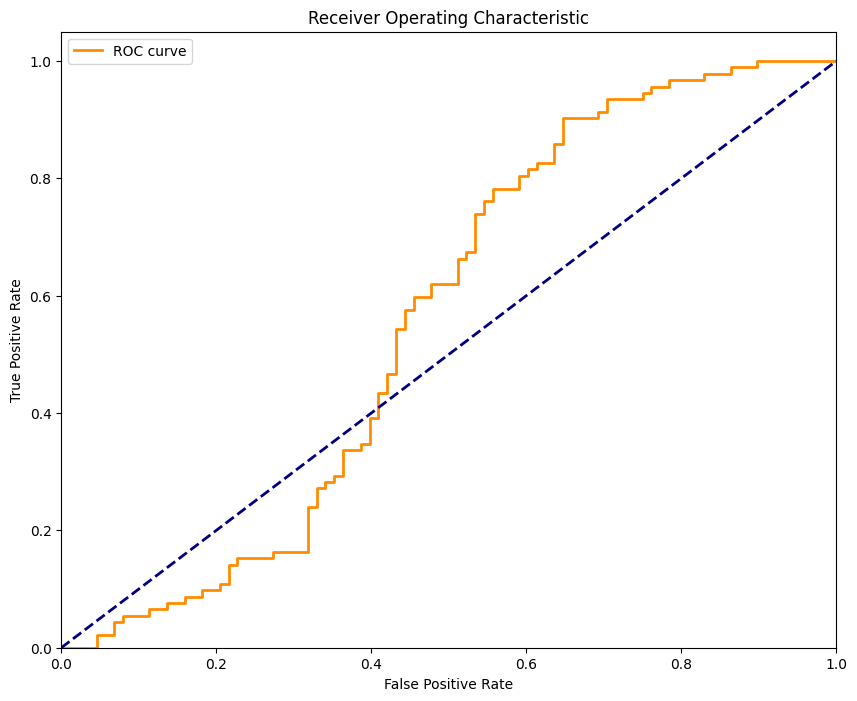

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(roc_data_sklearn['FPR'], roc_data_sklearn['TPR'], color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(["ROC curve"])

plt.show()

## ROC-AUC

Вычислить показатель ROC-AUC и сделать вывод о качестве модели.

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(df_data[3], df_data['probabilities'])
roc_auc

0.5590415019762847

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00e3e219-c153-40f3-8b97-6cd41ecf47af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>